In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np

In [2]:
rng = np.random

In [68]:
# parameters:
learning_rate = 0.01 # Wenn die lernrate zu hoch geht, spuckt der optimierer immer NaN aus. Abgesehen davon, dass eine zu hohe lern rate kein sinn hat
training_steps = 1000
display_step = 50

In [69]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [70]:
# Random weights and bias
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b)
def linear_regression(x):
    return W * x + b

# MSE
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer // stochastisches gradientenabstiegsverfahren
optimizer = tf.optimizers.SGD(learning_rate)

In [71]:
# Optimierungs Prozess
def run_optimization():
    # Berechnung in einem GradientTape für automatische differenzierung
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    # Gradient Berechnen
    gradients = g.gradient(loss, [W, b])
    
    # W und b nach Gradient updaten
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [72]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.154381, W: 0.242468, b: 0.863790
step: 100, loss: 0.154268, W: 0.243517, b: 0.856353
step: 150, loss: 0.154179, W: 0.244446, b: 0.849767
step: 200, loss: 0.154110, W: 0.245269, b: 0.843935
step: 250, loss: 0.154055, W: 0.245997, b: 0.838770
step: 300, loss: 0.154013, W: 0.246642, b: 0.834196
step: 350, loss: 0.153979, W: 0.247214, b: 0.830145
step: 400, loss: 0.153953, W: 0.247720, b: 0.826559
step: 450, loss: 0.153932, W: 0.248168, b: 0.823382
step: 500, loss: 0.153916, W: 0.248564, b: 0.820569
step: 550, loss: 0.153904, W: 0.248916, b: 0.818078
step: 600, loss: 0.153894, W: 0.249227, b: 0.815872
step: 650, loss: 0.153886, W: 0.249503, b: 0.813919
step: 700, loss: 0.153880, W: 0.249747, b: 0.812189
step: 750, loss: 0.153875, W: 0.249963, b: 0.810657
step: 800, loss: 0.153871, W: 0.250154, b: 0.809300
step: 850, loss: 0.153868, W: 0.250323, b: 0.808099
step: 900, loss: 0.153866, W: 0.250474, b: 0.807035
step: 950, loss: 0.153864, W: 0.250606, b: 0.806093
step: 1000, l

In [73]:
import matplotlib.pyplot as plt

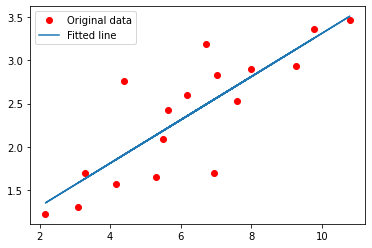

In [74]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [75]:
# Logistic Regression with the MNIST Data Set
#
#
#
#
#
#
#
#
#
num_classes = 10 # von 0 bis 9
num_features = 28 * 28 # Die einzelnen Bilder sind 28 * 28

# Trainings Params
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [76]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [83]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [85]:
# Weights shape [784, 10] da Input = 28 * 28 und dann noch für die 10 möglichen klassen
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Bias shape [10] da die Inputs kein bias haben
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression:
def logistic_regression(x):
    # Softmax zur normalisierung für Wahrscheinlickeitsverteilung
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function
def cross_entropy(y_pred, y_true):
    # One Hot vector
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))

def accuracy(y_pred, y_true):
    # Höchster Score ist die vorrausgesagte Klasse
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Gradientoptimierer
optimizer = tf.optimizers.SGD(learning_rate)

In [86]:
# Optimization process.
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [93]:
# Hier ist gut zu erkennen, dass mehr training nicht immer zum besseren Ergebnis führt. Der Loss geht im allgemeinen r unter aber die Acc schwankt. 
# Hier könnten sich andere Verfahren anbieten um ggf. overfitting zu verhindern.

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 0.628831, accuracy: 0.855469
step: 100, loss: 0.533036, accuracy: 0.894531
step: 150, loss: 0.544943, accuracy: 0.890625
step: 200, loss: 0.593655, accuracy: 0.847656
step: 250, loss: 0.580509, accuracy: 0.851562
step: 300, loss: 0.550355, accuracy: 0.886719
step: 350, loss: 0.553981, accuracy: 0.878906
step: 400, loss: 0.539528, accuracy: 0.875000
step: 450, loss: 0.536410, accuracy: 0.863281
step: 500, loss: 0.577185, accuracy: 0.867188
step: 550, loss: 0.529824, accuracy: 0.871094
step: 600, loss: 0.678038, accuracy: 0.804688
step: 650, loss: 0.487514, accuracy: 0.882812
step: 700, loss: 0.460288, accuracy: 0.906250
step: 750, loss: 0.477568, accuracy: 0.890625
step: 800, loss: 0.507908, accuracy: 0.863281
step: 850, loss: 0.502708, accuracy: 0.871094
step: 900, loss: 0.470778, accuracy: 0.890625
step: 950, loss: 0.540850, accuracy: 0.855469
step: 1000, loss: 0.475161, accuracy: 0.898438


In [94]:
# Testing the model
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.885400


In [95]:
import matplotlib.pyplot as plt

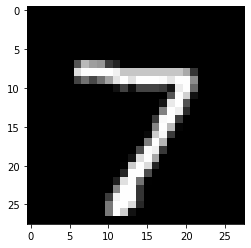

Model prediction: 7


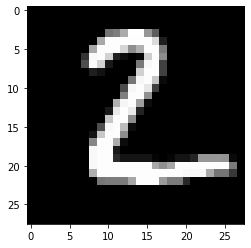

Model prediction: 2


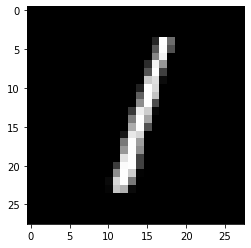

Model prediction: 1


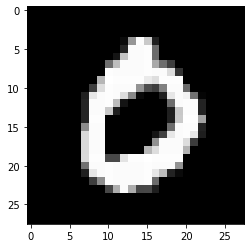

Model prediction: 0


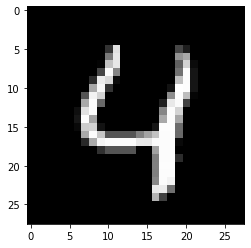

Model prediction: 4


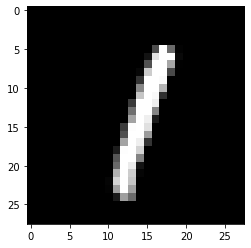

Model prediction: 1


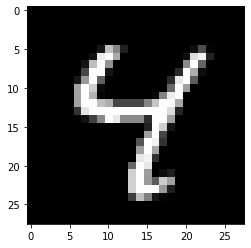

Model prediction: 4


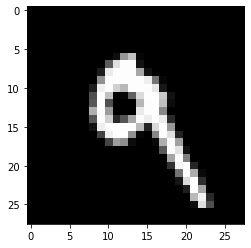

Model prediction: 9


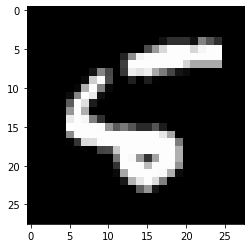

Model prediction: 6


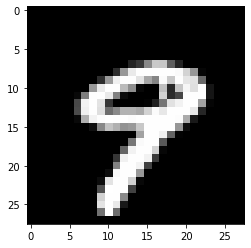

Model prediction: 9


In [96]:
n_images = 10
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

In [97]:
########################
########################
### Word 2 Vec #########
########################
########################

In [159]:
from __future__ import division, print_function, absolute_import

import collections
import os
import random
import urllib.request
import zipfile

import numpy as np
import tensorflow as tf

In [160]:
# Training Parameters.
learning_rate = 0.1
batch_size = 128
num_steps = 3000000
display_step = 10000
eval_step = 200000

# Evaluation Parameters.
eval_words = ['five', 'of', 'going', 'hardware', 'american', 'britain']

# Word2Vec Parameters.
embedding_size = 200 # Dimension of the embedding vector.
max_vocabulary_size = 50000 # Total number of different words in the vocabulary.
min_occurrence = 10 # Remove all words that does not appears at least n times.
skip_window = 3 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
num_sampled = 64 # Number of negative examples to sample.

In [161]:
# Download Wikipedia sample
url = 'http://mattmahoney.net/dc/text8.zip'
data_path = 'text8.zip'
if not os.path.exists(data_path):
    print("Downloading the dataset...")
    filename, _ = urllib.request.urlretrieve(url, data_path)
    print("Done")
    
with zipfile.ZipFile(data_path) as f:
    text_words = f.read(f.namelist()[0]).lower().decode('UTF-8').split()

In [162]:
# Bauen des Dict. seltene Wörter werden mit UNK ersetzt
count = [('UNK', -1)]
count.extend(collections.Counter(text_words).most_common(max_vocabulary_size - 1))

for i in range(len(count) - 1, -1, -1):
    if count[i][1] < min_occurrence:
        count.pop(i)
    else:
        # Fertig sortiert
        break

vocabulary_size = len(count)
word2id = dict()
for i, (word, _)in enumerate(count):
    word2id[word] = i

data = list()
unk_count = 0
for word in text_words:
    # Retrieve a word id, or assign it index 0 ('UNK') if not in dictionary.
    index = word2id.get(word, 0)
    if index == 0:
        unk_count += 1
    data.append(index)
count[0] = ('UNK', unk_count)
id2word = dict(zip(word2id.values(), word2id.keys()))

print("Words count:", len(text_words))
print("Unique words:", len(set(text_words)))
print("Vocabulary size:", vocabulary_size)
print("Most common words:", count[:10])

Words count: 17005207
Unique words: 253854
Vocabulary size: 47135
Most common words: [('UNK', 444176), ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764), ('in', 372201), ('a', 325873), ('to', 316376), ('zero', 264975), ('nine', 250430)]


In [163]:
data_index = 0

def next_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    
    # window size
    span = 2 * skip_window + 1
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer.extend(data[0:span])
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
            
    # Backtrack a little bit to avoid skipping words in the end of a batch.
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

In [164]:
# Ensure the following ops & var are assigned on CPU
# (some ops are not compatible on GPU).
with tf.device('/cpu:0'):
    # Create the embedding variable (each row represent a word embedding vector).
    embedding = tf.Variable(tf.random.normal([vocabulary_size, embedding_size]))
    # Construct the variables for the NCE loss.
    nce_weights = tf.Variable(tf.random.normal([vocabulary_size, embedding_size]))
    nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

def get_embedding(x):
    with tf.device('/cpu:0'):
        # Lookup the corresponding embedding vectors for each sample in X.
        x_embed = tf.nn.embedding_lookup(embedding, x)
        return x_embed

    
# Noise Contrastive Estimation // Rausch Kontrastive Schätzung
def nce_loss(x_embed, y):
    with tf.device('/cpu:0'):
        # Compute the average NCE loss for the batch.
        y = tf.cast(y, tf.int64)
        loss = tf.reduce_mean(
            tf.nn.nce_loss(weights=nce_weights,
                           biases=nce_biases,
                           labels=y,
                           inputs=x_embed,
                           num_sampled=num_sampled,
                           num_classes=vocabulary_size))
        return loss

# Evaluation.
def evaluate(x_embed):
    with tf.device('/cpu:0'):
        # Compute the cosine similarity between input data embedding and every embedding vectors
        x_embed = tf.cast(x_embed, tf.float32)
        x_embed_norm = x_embed / tf.sqrt(tf.reduce_sum(tf.square(x_embed)))
        embedding_norm = embedding / tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keepdims=True), tf.float32)
        cosine_sim_op = tf.matmul(x_embed_norm, embedding_norm, transpose_b=True)
        return cosine_sim_op

# Define the optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [165]:
def run_optimization(x, y):
    with tf.device('/cpu:0'):
        with tf.GradientTape() as g:
            emb = get_embedding(x)
            loss = nce_loss(emb, y)

        gradients = g.gradient(loss, [embedding, nce_weights, nce_biases])
        optimizer.apply_gradients(zip(gradients, [embedding, nce_weights, nce_biases]))

In [ ]:
# Words for testing.
x_test = np.array([word2id[w] for w in eval_words])

# Run training for the given number of steps.
for step in range(1, num_steps + 1):
    batch_x, batch_y = next_batch(batch_size, num_skips, skip_window)
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0 or step == 1:
        loss = nce_loss(get_embedding(batch_x), batch_y)
        print("step: %i, loss: %f" % (step, loss))
        
    # Evaluation.
    if step % eval_step == 0 or step == 1:
        print("Evaluation...")
        sim = evaluate(get_embedding(x_test)).numpy()
        for i in range(len(eval_words)):
            top_k = 8  # number of nearest neighbors.
            nearest = (-sim[i, :]).argsort()[1:top_k + 1]
            log_str = '"%s" nearest neighbors:' % eval_words[i]
            for k in range(top_k):
                log_str = '%s %s,' % (log_str, id2word[nearest[k]])
            print(log_str)

step: 1, loss: 495.719299
Evaluation...
"five" nearest neighbors: semitone, dismantling, tendon, oftentimes, hermetic, precaution, dresses, birthrate,
"of" nearest neighbors: kwajalein, improves, integrins, rigidity, leslie, newtonian, hep, fets,
"going" nearest neighbors: laptops, lyceum, eddington, airflow, i, wrongdoing, untouched, informants,
"hardware" nearest neighbors: allows, delgado, fade, translation, ieung, contending, charles, inconsistent,
"american" nearest neighbors: happening, clades, cezanne, arpa, tanach, colic, ailey, abram,
"britain" nearest neighbors: cordillera, voluntary, honorific, vitality, sociable, ayla, replication, hannibal,
step: 10000, loss: 123.904053
step: 20000, loss: 68.066299
step: 30000, loss: 60.279987
step: 40000, loss: 29.197636
step: 50000, loss: 31.629002
step: 60000, loss: 37.361191
step: 70000, loss: 24.639824
step: 80000, loss: 24.291588
step: 90000, loss: 26.804214
step: 100000, loss: 19.343039
step: 110000, loss: 27.505978
step: 120000, lo

In [1]:
###############################################
#### Gradient Boosted Decision Tree (GBDT) ####
###############################################

from __future__ import print_function

# Ignore all GPUs (current TF GBDT does not support GPU).
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "1"

import tensorflow as tf
import numpy as np
import copy

In [2]:
num_classes = 2
num_features = 13

# Training
max_steps = 2000
batch_size = 256
learning_rate = 1.0
l1_regul = 0.0
l2_regul = 0.1

# GBDT Params
num_batches_per_layer = 1000
num_trees = 10
max_depth = 4

In [3]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Zur klassifizierung, 2 Klassen: Preis > 23k oder kleiner
def to_binary_class(y):
    for i, label in enumerate(y):
        if label >= 23.0:
            y[i] = 1
        else:
            y[i] = 0
    return y

y_train_binary = to_binary_class(copy.deepcopy(y_train))
y_test_binary = to_binary_class(copy.deepcopy(y_test))

57344/57026 [==============================] - 0s 1us/step


In [4]:
# GBDT Klassifizierer
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_train}, y=y_train_binary, batch_size=batch_size, num_epochs=None, shuffle=True)
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_test}, y=y_test_binary, batch_size=batch_size, num_epochs=1, shuffle=False)
test_train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_train}, y=y_train_binary, batch_size=batch_size, num_epochs=1, shuffle=False)

# GBDT Modelle von TF Estimator brauchen 'feature column' Datenformat
feature_columns = [tf.feature_column.numeric_column(key='x', shape=(num_features, ))]

In [5]:
gbdt_classifier = tf.estimator.BoostedTreesClassifier(
    n_batches_per_layer=num_batches_per_layer,
    feature_columns=feature_columns, 
    n_classes=num_classes,
    learning_rate=learning_rate, 
    n_trees=num_trees,
    max_depth=max_depth,
    l1_regularization=l1_regul, 
    l2_regularization=l2_regul
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmpuo7qz7go', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026C6B233208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [6]:
gbdt_classifier.train(train_input_fn, max_steps=max_steps)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Type is unsupported, or the types of the items do

In [7]:
gbdt_classifier.evaluate(test_train_input_fn)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T12:16:52Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpuo7qz7go\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-09-12:16:53
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.87376237, accuracy_baseline = 0.63118815, auc = 0.92280567, auc_precision_recall = 0.9104949, average_loss = 0.3823539, global_step = 2000, label/mean = 0.36881188, loss = 0.38617975, precision = 0.8888889, prediction/mean = 0.3789625, recall = 0.7516779
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:t

{'accuracy': 0.87376237,
 'accuracy_baseline': 0.63118815,
 'auc': 0.92280567,
 'auc_precision_recall': 0.9104949,
 'average_loss': 0.3823539,
 'label/mean': 0.36881188,
 'loss': 0.38617975,
 'precision': 0.8888889,
 'prediction/mean': 0.3789625,
 'recall': 0.7516779,
 'global_step': 2000}

In [8]:
gbdt_classifier.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T12:17:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpuo7qz7go\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-09-12:17:22
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.78431374, accuracy_baseline = 0.5588235, auc = 0.8458089, auc_precision_recall = 0.86285317, average_loss = 0.49402776, global_step = 2000, label/mean = 0.44117647, loss = 0.49402776, precision = 0.87096775, prediction/mean = 0.37467557, recall = 0.6
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Nico\AppData\Local\Temp\tmpuo7qz7go\model.ckpt-2000


{'accuracy': 0.78431374,
 'accuracy_baseline': 0.5588235,
 'auc': 0.8458089,
 'auc_precision_recall': 0.86285317,
 'average_loss': 0.49402776,
 'label/mean': 0.44117647,
 'loss': 0.49402776,
 'precision': 0.87096775,
 'prediction/mean': 0.37467557,
 'recall': 0.6,
 'global_step': 2000}

In [9]:
# GBDT Regressor
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_train}, y=y_train,
    batch_size=batch_size, num_epochs=None, shuffle=True)
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_test}, y=y_test,
    batch_size=batch_size, num_epochs=1, shuffle=False)
# GBDT Models from TF Estimator requires 'feature_column' data format.
feature_columns = [tf.feature_column.numeric_column(key='x', shape=(num_features,))]

In [10]:
gbdt_regressor = tf.estimator.BoostedTreesRegressor(
    n_batches_per_layer=num_batches_per_layer,
    feature_columns=feature_columns, 
    learning_rate=learning_rate, 
    n_trees=num_trees,
    max_depth=max_depth,
    l1_regularization=l1_regul, 
    l2_regularization=l2_regul
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Nico\\AppData\\Local\\Temp\\tmpe99cimsv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000026C726EBFC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
gbdt_regressor.train(train_input_fn, max_steps=max_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Nico\AppData\Local\Temp\tmpe99cimsv\model.ckpt.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:loss = 618.8738, step = 0
INFO:tensorflow:loss = 560.51587, step = 0 (0.181 sec)
INFO:tensorflo

In [12]:
gbdt_regressor.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-09T12:19:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Nico\AppData\Local\Temp\tmpe99cimsv\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-09-09-12:19:01
INFO:tensorflow:Saving dict for global step 2000: average_loss = 30.205061, global_step = 2000, label/mean = 23.078432, loss = 30.205061, prediction/mean = 22.53553
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Nico\AppData\Local\Temp\tmpe99cimsv\model.ckpt-2000


{'average_loss': 30.205061,
 'label/mean': 23.078432,
 'loss': 30.205061,
 'prediction/mean': 22.53553,
 'global_step': 2000}